<a href="https://colab.research.google.com/github/Priya-gawhane/Machine-learning-prediction-Models-Projects/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


data collection and preprocessing

In [14]:
data_frame = pd.read_csv('/content/data.csv')

In [15]:
data_frame.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [16]:

data_frame.drop(['Unnamed: 32', 'id'], axis = 1)
print(data_frame.shape)

(569, 33)


In [30]:
data_frame.drop(['Unnamed: 32', 'id'], axis = 1)
data_frame.diagnosis = [1 if each == "M" else 0 for each in data_frame.diagnosis]


In [33]:
y = data_frame.diagnosis.values
x_data = data_frame.drop(['diagnosis'], axis = 1)


In [36]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [34]:

def diagnosis_value(diagnosis):
	if diagnosis == 'M':
		return 1
	else:
		return 0

data_frame['diagnosis'] = data_frame['diagnosis'].apply(diagnosis_value)


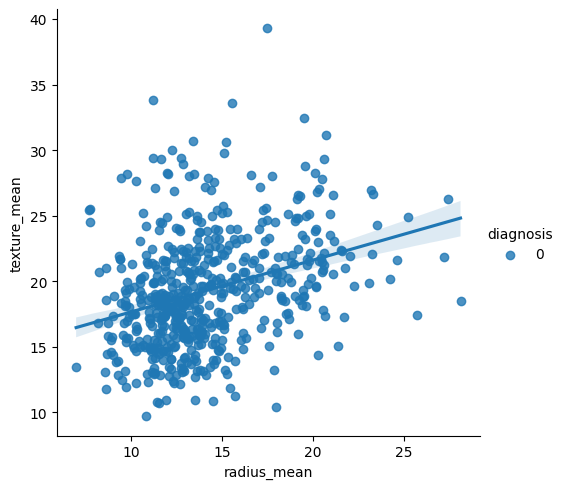

In [35]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data_frame)


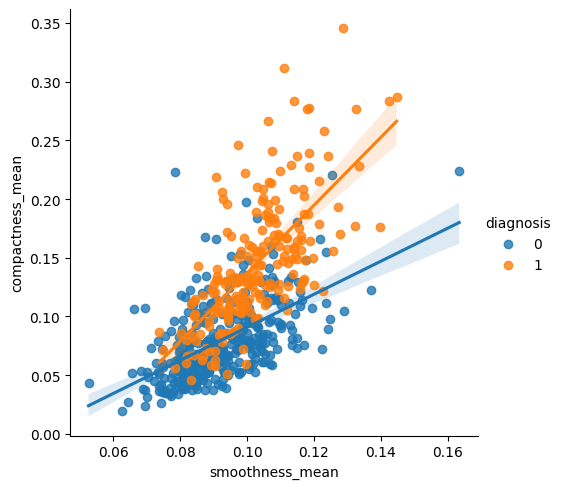

In [19]:

sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
		data = data_frame, hue = 'diagnosis')


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


In [38]:
def initialize_weights_and_bias(dimension):
	w = np.full((dimension, 1), 0.01)
	b = 0.0
	return w, b


In [39]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
	y_head = 1/(1 + np.exp(-z))
	return y_head


In [40]:
def forward_backward_propagation(w, b, x_train, y_train):
	z = np.dot(w.T, x_train) + b
	y_head = sigmoid(z)
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
	# x_train.shape[1] is for scaling
	cost = (np.sum(loss)) / x_train.shape[1]

	# backward propagation
	derivative_weight = (np.dot(x_train, (
		(y_head - y_train).T))) / x_train.shape[1]
	derivative_bias = np.sum(
		y_head-y_train) / x_train.shape[1]
	gradients = {"derivative_weight": derivative_weight,
				"derivative_bias": derivative_bias}
	return cost, gradients


In [41]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	# updating(learning) parameters is number_of_iterarion times
	for i in range(number_of_iterarion):
		# make forward and backward propagation and find cost and gradients
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
		cost_list.append(cost)

		# lets update
		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	# update(learn) parameters weights and bias
	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()
	return parameters, gradients, cost_list


In [42]:
def predict(w, b, x_test):
	# x_test is a input for forward propagation
	z = sigmoid(np.dot(w.T, x_test)+b)
	Y_prediction = np.zeros((1, x_test.shape[1]))

	# if z is bigger than 0.5, our prediction is sign one (y_head = 1),
	# if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction


Cost after iteration  0:  nan
Cost after iteration  10:  nan
Cost after iteration  20:  nan
Cost after iteration  30:  nan
Cost after iteration  40:  nan
Cost after iteration  50:  nan
Cost after iteration  60:  nan
Cost after iteration  70:  nan
Cost after iteration  80:  nan
Cost after iteration  90:  nan


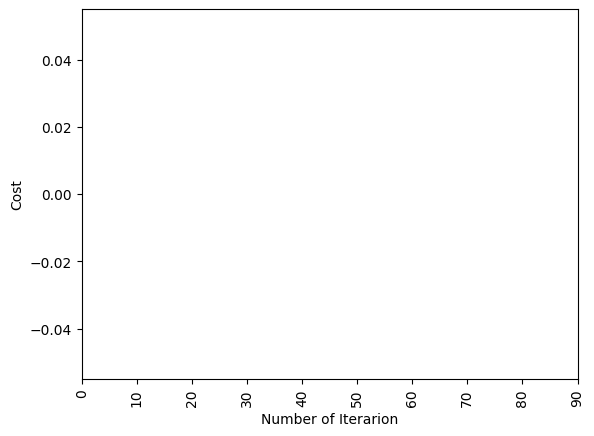

train accuracy: 0.0 %
test accuracy: 0.0 %


In [45]:
def logistic_regression(x_train, y_train, x_test, y_test,
						learning_rate, num_iterations):

	dimension = x_train.shape[0]
	w, b = initialize_weights_and_bias(dimension)

	parameters, gradients, cost_list = update(
		w, b, x_train, y_train, learning_rate, num_iterations)

	y_prediction_test = predict(
		parameters["weight"], parameters["bias"], x_test)
	y_prediction_train = predict(
		parameters["weight"], parameters["bias"], x_train)

	# train / test Errors
	print("train accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
	print("test accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test,
					y_test, learning_rate = 1, num_iterations = 100)


In [21]:
X = np.array(data_frame.iloc[:, 1:])
y = np.array(data_frame['diagnosis'])
